In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.date_range('jan 01 2021', periods=12, freq = 'M')

DatetimeIndex(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', freq='M')

In [3]:
date_1 = pd.date_range('jan 01 2021', periods=12, freq = 'M')

In [4]:
date_1

DatetimeIndex(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', freq='M')

In [6]:
date_2 = pd.date_range('jan 01 2021', periods=4, freq = '3M')
date_2

DatetimeIndex(['2021-01-31', '2021-04-30', '2021-07-31', '2021-10-31'], dtype='datetime64[ns]', freq='3M')

In [7]:
date_3 = pd.date_range('jan 01 2021', periods=8760, freq = 'H')
date_3

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 01:00:00',
               '2021-01-01 02:00:00', '2021-01-01 03:00:00',
               '2021-01-01 04:00:00', '2021-01-01 05:00:00',
               '2021-01-01 06:00:00', '2021-01-01 07:00:00',
               '2021-01-01 08:00:00', '2021-01-01 09:00:00',
               ...
               '2021-12-31 14:00:00', '2021-12-31 15:00:00',
               '2021-12-31 16:00:00', '2021-12-31 17:00:00',
               '2021-12-31 18:00:00', '2021-12-31 19:00:00',
               '2021-12-31 20:00:00', '2021-12-31 21:00:00',
               '2021-12-31 22:00:00', '2021-12-31 23:00:00'],
              dtype='datetime64[ns]', length=8760, freq='H')

In [9]:
data_set = np.random.randint(1, 1000, (8760,2))

In [10]:
data_set

array([[407, 882],
       [775, 330],
       [590, 902],
       ...,
       [ 94, 190],
       [221, 219],
       [118, 232]])

In [11]:
df = pd.DataFrame(data_set)

In [13]:
df.head()

,0,1
0,407,882
1,775,330
2,590,902
3,139,704
4,829,115


In [14]:
df.set_index(date_3, inplace=True)

In [15]:
df

,0,1
2021-01-01 00:00:00,407,882
2021-01-01 01:00:00,775,330
2021-01-01 02:00:00,590,902
2021-01-01 03:00:00,139,704
2021-01-01 04:00:00,829,115
...,...,...
2021-12-31 19:00:00,511,330
2021-12-31 20:00:00,566,589
2021-12-31 21:00:00,94,190
2021-12-31 22:00:00,221,219


In [21]:
df2 = pd.read_csv('forecasting_study_2023/Data-Set.csv', index_col='DATE', parse_dates=True)

In [23]:
df2.head()

,Stock market Price
DATE,
2021-01-01 00:00:00,1773
2021-01-01 01:00:00,1244
2021-01-01 02:00:00,1126
2021-01-01 03:00:00,1250
2021-01-01 04:00:00,1614


In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2021-01-01 00:00:00 to 2021-01-07 23:00:00
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Stock market Price  168 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


## Resampling method!

In [27]:
# Changing df2 from hours to daily
rs_df2 = df.resample(rule='D').mean()

In [28]:
rs_df2

,0,1
2021-01-01,542.541667,465.375000
2021-01-02,577.166667,404.000000
2021-01-03,472.583333,485.625000
2021-01-04,533.958333,583.625000
2021-01-05,564.041667,574.958333
...,...,...
2021-12-27,530.166667,423.583333
2021-12-28,476.250000,542.250000
2021-12-29,543.791667,452.250000
2021-12-30,431.708333,486.958333


In [29]:
rs_df2 = df.resample(rule='A').mean()

In [30]:
rs_df2

,0,1
2021-12-31,496.472831,497.143836


## ARIMA model

In [2]:
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('forecasting_study_2023/Temp-Data.csv', index_col='DATE', parse_dates=True)

In [35]:
df.head()

,Temp,relative_humidity,wind_speed,Pressure
DATE,,,,
2020-01-01,-0.44,86.0,18.5,100.15
2020-01-02,-0.09,79.0,14.0,100.47
2020-01-03,2.95,82.0,12.0,100.64
2020-01-04,-0.80,86.0,15.0,100.75
2020-01-05,-7.95,74.5,15.0,101.06


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 524 entries, 2020-01-01 to 2021-06-07
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temp               524 non-null    float64
 1   relative_humidity  524 non-null    float64
 2   wind_speed         524 non-null    float64
 3   Pressure           524 non-null    float64
dtypes: float64(4)
memory usage: 20.5 KB


In [37]:
df.index.freq = 'D'

In [39]:
df.dropna(inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 524 entries, 2020-01-01 to 2021-06-07
Freq: D
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temp               524 non-null    float64
 1   relative_humidity  524 non-null    float64
 2   wind_speed         524 non-null    float64
 3   Pressure           524 non-null    float64
dtypes: float64(4)
memory usage: 20.5 KB


In [9]:
df_tmptre = pd.DataFrame(df['Temp'])

<AxesSubplot:xlabel='DATE'>

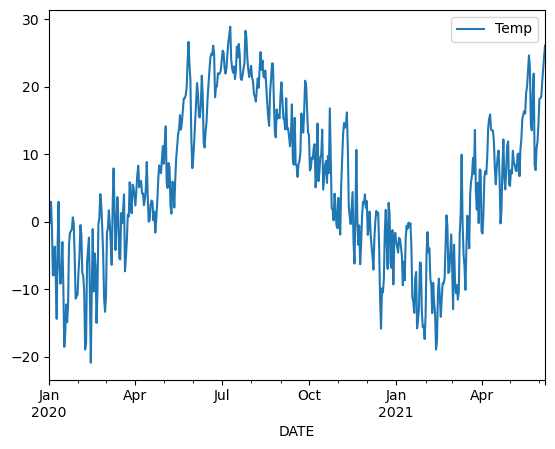

In [43]:
df_tmptre.plot()

In [13]:
train = df_tmptre.iloc[:518,0]

In [14]:
test = df_tmptre.iloc[518:, 0]

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [10]:
decomp_res = seasonal_decompose(df_tmptre)

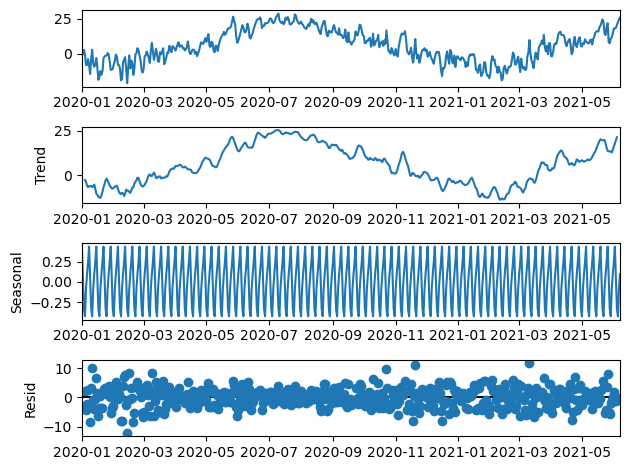

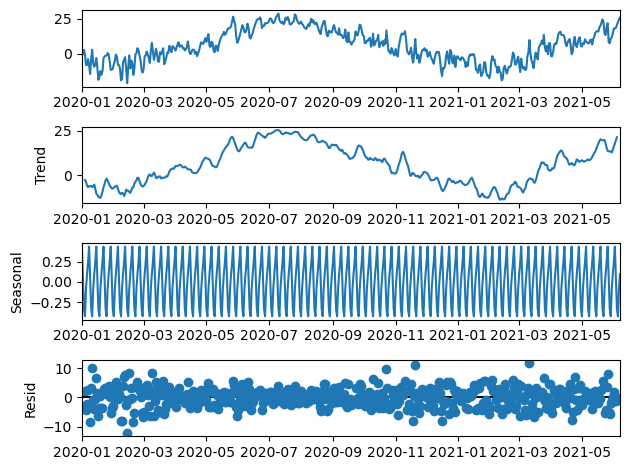

In [46]:
decomp_res.plot()

In [48]:
# decomp_res.seasonal.plot()

In [49]:
# Finding the Parameters (p, d, q)

In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\ztvsp\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


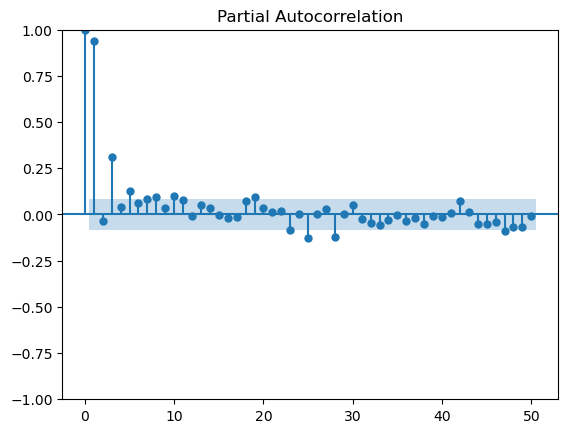

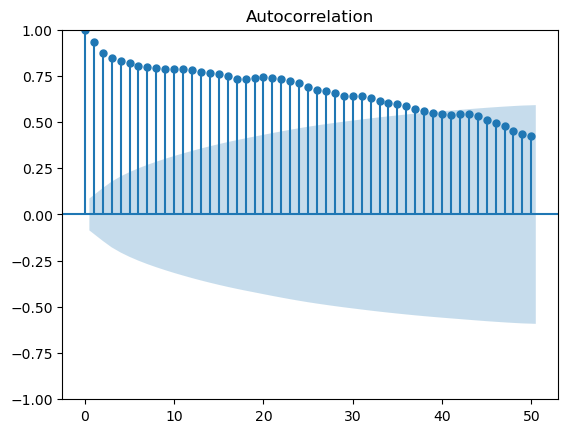

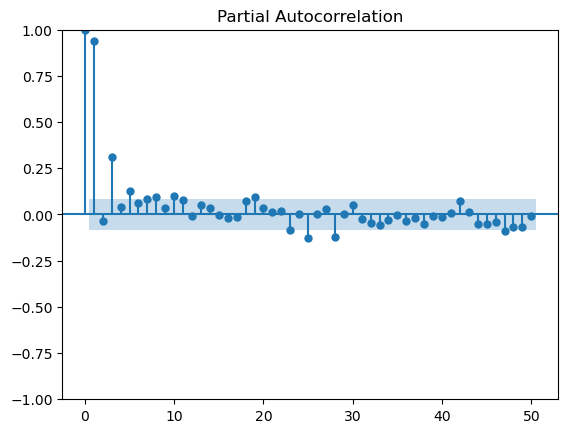

In [53]:
plot_acf(train, lags=50)
plot_pacf(train, lags=50)

In [56]:
pip install pmdarima

     -------------------------------------- 572.7/572.7 kB 2.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
from pmdarima import auto_arima

In [11]:
auto_arima(df_tmptre, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2846.718, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2929.050, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2931.026, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2930.983, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2927.135, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2845.685, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2856.303, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2882.045, Time=0.27 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2846.604, Time=0.40 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2848.805, Time=0.28 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2858.051, Time=0.33 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2848.587, Time=0.73 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2844.520, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2854.723, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]          

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [5]:
from statsmodels.tsa.arima.model import ARIMA

In [17]:
a_model = ARIMA(train, order = (1,1,2))

C:\Users\ztvsp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ztvsp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ztvsp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [18]:
predictor = a_model.fit()

In [19]:
predictor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Temp   No. Observations:                  518
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1403.093
Date:                Wed, 03 May 2023   AIC                           2814.185
Time:                        08:43:09   BIC                           2831.177
Sample:                    01-01-2020   HQIC                          2820.843
                         - 06-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3186      0.076      4.179      0.000       0.169       0.468
ma.L1         -0.3826      0.073     -5.257      0.000      -0.525      -0.240
ma.L2         -0.4057      0.046     -8.824      0.000      -0.496      -0.316
sigma2        13.3124      0.793     16.793      0.000      11.759      14.866
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 5.39
Prob(Q):                              0.89   Prob(JB):                         0.07
Heteroskedasticity (H):               1.09   Skew:                            -0.19
Prob(H) (two-sided):                  0.58   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
predicted_results = predictor.predict(start = len(train), end = len(train) + len(test) - 1, type='levels')

In [22]:
predicted_results

2021-06-02    17.562646
2021-06-03    16.052579
2021-06-04    15.571485
2021-06-05    15.418214
2021-06-06    15.369383
2021-06-07    15.353826
Freq: D, Name: predicted_mean, dtype: float64

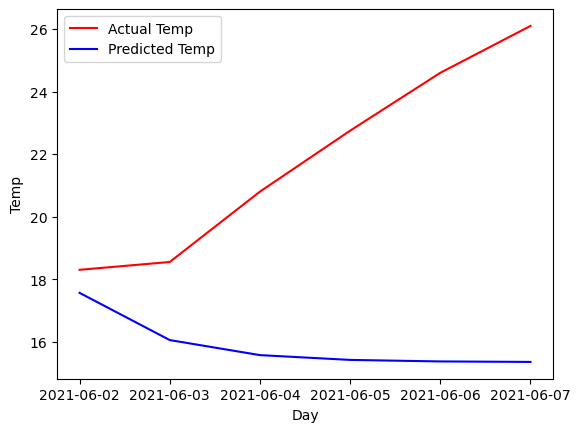

In [24]:
plt.plot(test, color='red', label = 'Actual Temp')
plt.plot(predicted_results, color='blue', label = 'Predicted Temp')
plt.xlabel('Day')
plt.ylabel('Temp')
plt.legend()

In [25]:
test.mean()

21.849999999999998

In [27]:
predicted_results.mean()

15.888021985671044

In [6]:
import math
from sklearn.metrics import mean_squared_error

In [29]:
rate = math.sqrt(mean_squared_error(test, predicted_results))

In [30]:
rate

6.934909538700621

In [31]:
df.index.freq = 'D'

In [32]:
df.head()

,Temp,relative_humidity,wind_speed,Pressure
DATE,,,,
2020-01-01,-0.44,86.0,18.5,100.15
2020-01-02,-0.09,79.0,14.0,100.47
2020-01-03,2.95,82.0,12.0,100.64
2020-01-04,-0.80,86.0,15.0,100.75
2020-01-05,-7.95,74.5,15.0,101.06


In [33]:
import seaborn as sns

<AxesSubplot:>

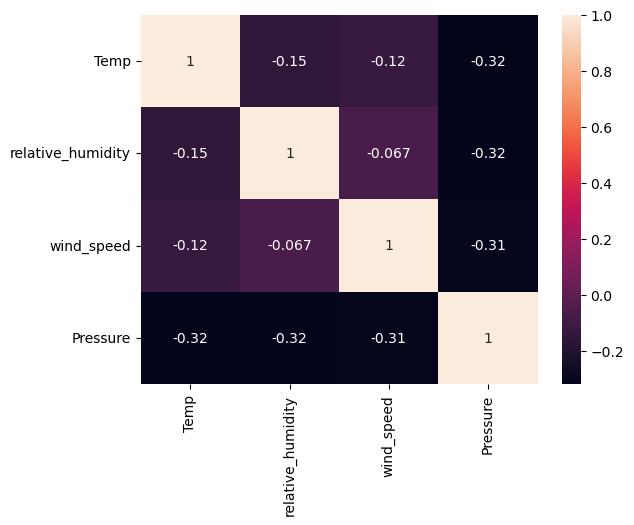

In [35]:
sns.heatmap(df.corr(), annot=True)

In [36]:
train = df.iloc[:510,0]
test = df.iloc[510:,0]

In [37]:
exo = df.iloc[:,1:4]

In [39]:
exo_train = exo.iloc[:510]

In [40]:
exo_test = exo.iloc[510:]

In [41]:
from pmdarima import auto_arima

In [49]:
auto_arima(df['Temp'], exogenous = exo, m = 7, trace = True, D=1).summary() # m выбирается исходя из графика Seasonal ниже

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[7] intercept   : AIC=inf, Time=6.20 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=3496.256, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=3019.995, Time=0.44 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=3035.173, Time=0.37 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=3495.332, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=3188.466, Time=0.14 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=2962.667, Time=1.35 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=3.82 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=1.12 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=3320.661, Time=0.60 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=2954.772, Time=1.06 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=3003.837, Time=0.28 sec
 ARIMA(2,0,0)(2,1,1)[7] intercept   : AIC=2925.714, Time=1.64 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=2923.819, Time=0.43 sec
 ARIMA(2,0,0)(0,1,1)[7] intercept   : AIC=inf, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  524
Model:             SARIMAX(2, 0, 1)x(1, 1, 1, 7)   Log Likelihood               -1447.346
Date:                           Wed, 03 May 2023   AIC                           2906.692
Time:                                   09:27:01   BIC                           2932.180
Sample:                               01-01-2020   HQIC                          2916.679
                                    - 06-07-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3000      0.128      2.336      0.019       0.048       0.552
ar.L2          0.4309      0.117      3.672      0.000       0.201       0.661
ma.L1          0.7082      0.112      6.348      0.000       0.490       0.927
ar.S.L7       -0.1025      0.054     -1.890      0.059      -0.209       0.004
ma.S.L7       -0.7775      0.040    -19.484      0.000      -0.856      -0.699
sigma2        15.5611      0.949     16.390      0.000      13.700      17.422
===================================================================================
Ljung-Box (L1) (Q):                   1.08   Jarque-Bera (JB):                12.11
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                            -0.33
Prob(H) (two-sided):                  0.94   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
decomp_results = seasonal_decompose(df['Temp'])

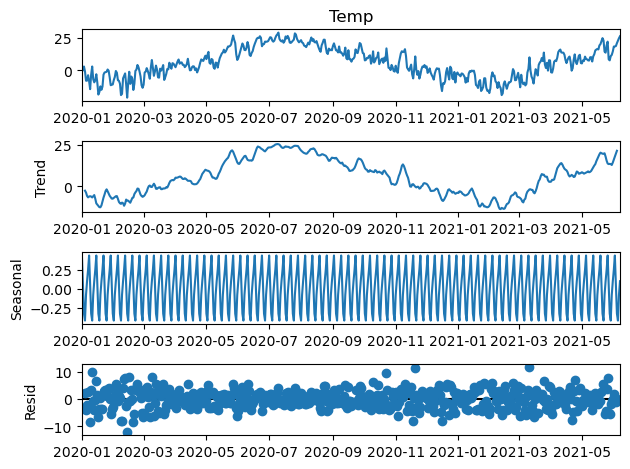

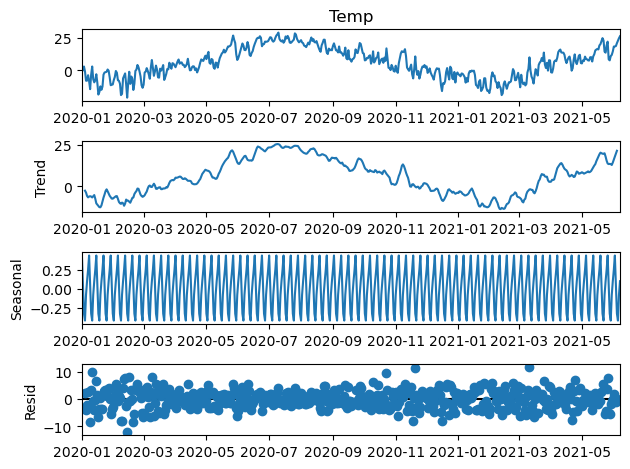

In [44]:
decomp_results.plot()

In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [51]:
model = SARIMAX(train, exog=exo_train, order=(2, 0, 1), seasonal_order=(1, 1, 1, 7))

In [59]:
model = model.fit()

C:\Users\ztvsp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [60]:
prediction = model.predict(len(train), len(train)+len(test)-1, exog=exo_test, typ='levels')

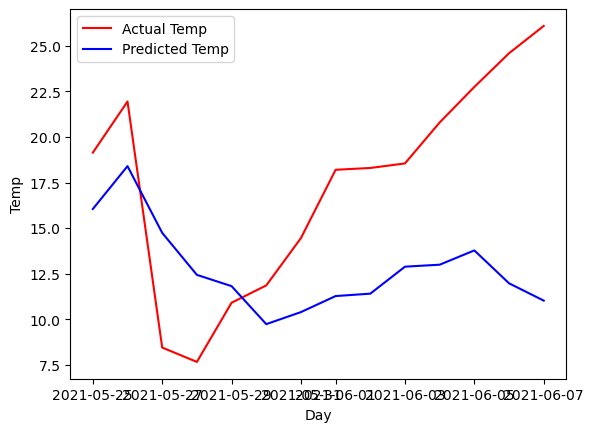

In [61]:
plt.plot(test, color='red', label = 'Actual Temp')
plt.plot(prediction, color='blue', label = 'Predicted Temp')
plt.xlabel('Day')
plt.ylabel('Temp')
plt.legend()

In [62]:
rate = math.sqrt(mean_squared_error(test, prediction))

In [63]:
rate

7.382851659529773

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('forecasting_study_2023/Solar-Data-Set.csv')

In [10]:
df.head()

,Date,Solar Ir
0,1/1/2019 0:00,0.0
1,1/1/2019 1:00,0.0
2,1/1/2019 2:00,0.0
3,1/1/2019 3:00,0.0
4,1/1/2019 4:00,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8760 non-null   object 
 1   Solar Ir   8760 non-null   float64
dtypes: float64(1), object(1)
memory usage: 137.0+ KB


In [6]:
df.isnull().sum()

Date         0
Solar Ir     0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
training_set = df.iloc[:8712, 1:2].values
test_set = df.iloc[8712:, 1:2].values

In [12]:
test_set.shape

(48, 1)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
sc = MinMaxScaler(feature_range=(0,1))

In [15]:
training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)

In [16]:
training_set_scaled.shape

(8712, 1)

In [17]:
X_train = []
y_train = []

In [18]:
WS = 24

In [19]:
for i in range(WS, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-WS:i, 0:1])
    y_train.append(training_set_scaled[1:0])

In [20]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [25]:
# Preprocessing

In [27]:
pip install keras


     ---------------------------------------- 1.7/1.7 MB 3.8 MB/s eta 0:00:00


In [21]:
from keras.models import Sequential

ModuleNotFoundError: No module named 'tensorflow'

In [22]:
pip install tensorflow

     -------------------------------------- 272.8/272.8 MB 5.5 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB ? eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 7.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     -------------------------------------- 440.7/440.7 kB 6.8 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 7.8 MB/s eta 0:00:00
     ---------------------------------------- 4.1/4.1 MB 7.5 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 7.7 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.7 MB/s eta 0:00:00
     --------------------------------------

ERROR: Could not install packages due to an OSError: [WinError 5] Отказано в доступе: 'C:\\Users\\ztvsp\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

